# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [6]:
de.load_data()
for i, data in enumerate(de.data):
    print(i,data.shape)

0 (620, 18)
1 (536, 18)
2 (515, 18)
3 (667, 18)
4 (525, 18)
5 (483, 18)
6 (618, 18)
7 (457, 18)
8 (507, 18)
9 (493, 18)
10 (509, 18)
11 (453, 18)
12 (483, 18)
13 (568, 18)
14 (567, 18)
15 (566, 18)
16 (558, 18)
17 (552, 18)
18 (566, 18)
19 (633, 18)
20 (638, 18)
21 (607, 18)
22 (477, 18)
23 (531, 18)
24 (940, 18)
25 (562, 18)
26 (564, 18)
27 (522, 18)
28 (486, 18)
29 (541, 18)
30 (586, 18)
31 (505, 18)
32 (498, 18)
33 (433, 18)


In [7]:
de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 49
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 37
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 59
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 138
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 95
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 90
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 107
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 83
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 70
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 74
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 85
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 59
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 86
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 71
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 58
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 55
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 52
i: 17 	shape X: (535, 

### 1.3  Transform data

In [8]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (18188,)
X: (18188, 18, 16)

Labels before removal of 'no movements'
0 15618
1 453
2 368
3 575
4 365
5 352
6 457

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (3070,)
X: (3070, 18, 16)

Labels after removal of 'no movements'
0 500
1 453
2 368
3 575
4 365
5 352
6 457

---------------------------------------------------------------------
Shapes after transformation:
y: (3070, 7)
X: (3070, 18, 16)


## 2 Train model

### 2.1  Split in train / test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [11]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
2456/2456 [==============================] - 5s 2ms/step - loss: 0.6456 - acc: 0.7907
Epoch 2/100
2456/2456 [==============================] - 5s 2ms/step - loss: 0.2273 - acc: 0.9353
Epoch 3/100
2456/2456 [==============================] - 4s 2ms/step - loss: 0.1881 - acc: 0.9499
Epoch 4/100
2456/2456 [==============================] - 4s 2ms/step - loss: 0.1638 - acc: 0.9532
Epoch 5/100
2456/2456 [==============================] - 4s 2ms/step - loss: 0.1627 - acc: 0.9548A: 0s - loss: 0.1669 - acc
Epoch 6/100
2456/2456 [==============================] - 4s 2ms/step - loss: 0.1503 - acc: 0.9572
Epoch 7/100
2456/2456 [==============================] - 6s 2ms/step - loss: 0.1441 - acc: 0.9593
Epoch 8/100
2456/2456 [==============================] - 5s 2ms/step - loss: 0.1407 - acc: 0.9564
Epoch 9/100
2456/2456 [==============================] - 5s 2ms/step - loss: 0.1299 - acc: 0.9642
Epoch 10/100
2456/2456 [==============================] - 5s 2ms/step - loss: 0.1244 - acc: 

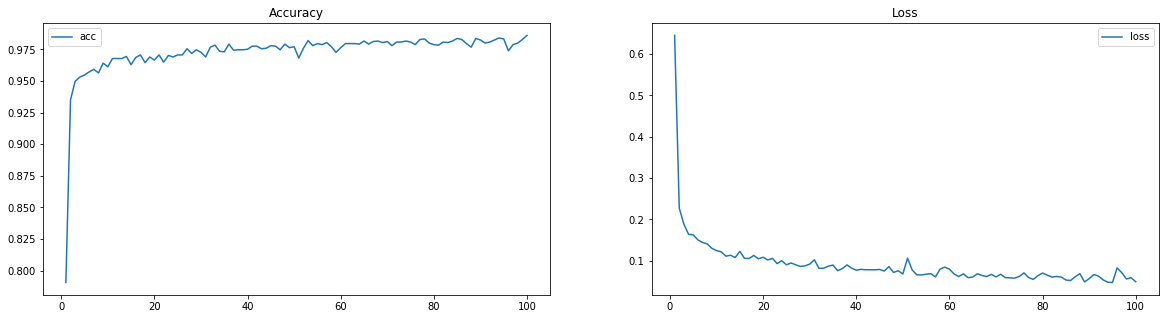

In [13]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [14]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

614/614 [==============================] - 1s 2ms/step
Loss:     0.09
Accuracy: 0.97


In [15]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 48 	Pred: 1 	Actual: 0 	Probability: 0.51
Index: 53 	Pred: 2 	Actual: 0 	Probability: 0.87
Index: 97 	Pred: 5 	Actual: 0 	Probability: 0.8
Index: 231 	Pred: 3 	Actual: 0 	Probability: 0.92
Index: 233 	Pred: 0 	Actual: 1 	Probability: 0.59
Index: 290 	Pred: 3 	Actual: 0 	Probability: 0.99
Index: 292 	Pred: 5 	Actual: 0 	Probability: 0.81
Index: 297 	Pred: 5 	Actual: 0 	Probability: 0.74
Index: 317 	Pred: 5 	Actual: 0 	Probability: 0.79
Index: 336 	Pred: 4 	Actual: 0 	Probability: 0.99
Index: 340 	Pred: 1 	Actual: 0 	Probability: 0.83
Index: 347 	Pred: 5 	Actual: 0 	Probability: 1.0
Index: 437 	Pred: 0 	Actual: 3 	Probability: 0.63
Index: 440 	Pred: 2 	Actual: 0 	Probability: 0.86
Index: 486 	Pred: 0 	Actual: 5 	Probability: 0.62
Index: 522 	Pred: 6 	Actual: 0 	Probability: 0.93
Index: 534 	Pred: 0 	Actual: 4 	Probability: 0.59
Index: 569 	Pred: 6 	Actual: 0 	Probability: 0.95
Index: 591 	Pred: 1 	Actual: 0 	Probability: 0.78


In [16]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 2 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 3 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 4 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 6 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 7 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 8 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 9 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 10 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 11 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 12 	Pred: 2 	Actual: 2 	Probability: 0.84
Index: 13 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 14 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 15 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 16 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 17 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 18 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 19 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 20 	Pred: 2 	Actual: 2 	Probability: 1.

Index: 179 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 180 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 181 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 182 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 183 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 184 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 185 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 186 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 187 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 188 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 189 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 190 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 191 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 192 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 193 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 194 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 195 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 196 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 197 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 198 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 199 	Pred:

Index: 361 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 362 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 363 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 364 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 365 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 366 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 367 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 368 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 369 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 370 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 371 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 372 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 373 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 374 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 375 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 376 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 377 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 378 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 379 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 380 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 381 	Pre

Index: 532 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 533 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 536 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 537 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 538 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 539 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 540 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 541 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 542 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 543 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 544 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 545 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 546 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 547 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 548 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 549 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 550 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 551 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 552 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 553 	Pred

### 2.4 Save model

In [17]:
from keras.models import load_model
import h5py

In [18]:
# save model, delete current reference and re-load it from file
model.save('models/model_gesture.h5')
del model
model = load_model('models/model_gesture.h5')

In [19]:
type(model)

keras.engine.sequential.Sequential